# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import *
import cv2
import skimage.io
import io
import os
from google.colab.patches import cv2_imshow

Read images from folder

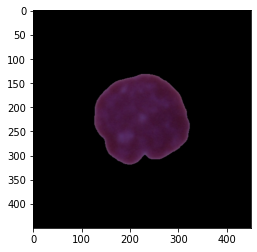

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_100_1_hem.bmp')
plt.imshow(img)

Load all images

In [ ]:
all = []
a = 0
hem = []
h = 0

In [ ]:
for i in os.scandir('/content/drive/MyDrive/Colab Notebooks/C-NMC_Leukemia/training_data/fold_0'):
    if i.path[75:78] == 'all':
        for j in os.scandir(i):
            if a<1100:
                img = cv2.imread(j.path)
                img = cv2.resize(img, (128,128))
                all.append(img)   
                a +=1 
    if i.path[75:78] == 'hem':
        for j in os.scandir(i):
            if h<1100:
                img = cv2.imread(j.path)
                img = cv2.resize(img, (128,128))
                hem.append(img) 
                h +=1
    if a == 1100 and h == 1100:
        break

In [ ]:
all = np.array(all)
hem = np.array(hem)
print(all.shape, hem.shape)

(1100, 128, 128, 3) (1100, 128, 128, 3)


In [ ]:
X = np.concatenate((all,hem), axis = 0)

Create target variable array

In [ ]:
Y = np.zeros((2200, 1))
for i in range(1100):
    Y[i] = 1

Building Neural Network

In [ ]:
def LeukModel(input_size = (128, 128, 3)):
    inpu = Input(shape = input_size)

    conv0 = Conv2D(8, (3, 3), activation = 'relu') (inpu)
    maxpool0 = MaxPooling2D((2,2)) (conv0)
    drop0 = Dropout(0.4) (maxpool0)
    
    conv1 = Conv2D(16, (3, 3), activation = 'relu') (drop0)
    maxpool1 = MaxPooling2D((2,2)) (conv1)
    drop1 = Dropout(0.4) (maxpool1)
    
    conv2 = Conv2D(32, (3, 3), activation = 'relu') (drop1)
    maxpool2 = MaxPooling2D((2, 2)) (conv2)
    drop2 = Dropout(0.4) (maxpool2)
    
    conv3 = Conv2D(64, (3, 3), activation = 'relu') (drop2)
    maxpool3 = MaxPooling2D((2, 2)) (conv3)
    drop3 = Dropout(0.4) (maxpool3)
    
    flat = Flatten() (drop3)
    
    dense1 = Dense(256, activation = 'relu') (flat)
    dense2 = Dense(128, activation = 'relu') (dense1)
    dense3 = Dense(64, activation = 'relu') (dense2)
    op = Dense(1, activation = 'sigmoid') (dense3)
    
    model = Model(inpu, op)
    
    return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size = 0.3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1540, 128, 128, 3) (660, 128, 128, 3) (1540, 1) (660, 1)


In [ ]:
model = LeukModel()
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                      

Training

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(0.00075), metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 40, batch_size = 32, shuffle = True)

Epoch 1/40
49/49 [==============================] - 1s 16ms/step - loss: 0.0728 - accuracy: 0.9734 - val_loss: 0.4338 - val_accuracy: 0.8939
Epoch 2/40
49/49 [==============================] - 0s 9ms/step - loss: 0.0617 - accuracy: 0.9792 - val_loss: 0.4641 - val_accuracy: 0.8818
Epoch 3/40
49/49 [==============================] - 0s 10ms/step - loss: 0.0738 - accuracy: 0.9747 - val_loss: 0.4488 - val_accuracy: 0.8773
Epoch 4/40
49/49 [==============================] - 1s 11ms/step - loss: 0.0754 - accuracy: 0.9708 - val_loss: 0.3910 - val_accuracy: 0.8758
Epoch 5/40
49/49 [==============================] - 0s 10ms/step - loss: 0.0762 - accuracy: 0.9675 - val_loss: 0.4201 - val_accuracy: 0.8909
Epoch 6/40
49/49 [==============================] - 1s 11ms/step - loss: 0.0906 - accuracy: 0.9656 - val_loss: 0.5460 - val_accuracy: 0.8530
Epoch 7/40
49/49 [==============================] - 0s 9ms/step - loss: 0.1026 - accuracy: 0.9688 - val_loss: 0.3515 - val_accuracy: 0.9000
Epoch 8/40
49/4

Evaluation

In [ ]:
train_perf = model.evaluate(X_train, Y_train)
test_perf = model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.8818


In [ ]:
# ALL - 0, HEM - 1

Testing using unseen data

[[0.]]


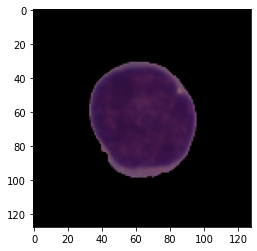

In [ ]:
testimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/C-NMC_Leukemia/training_data/fold_1/all/UID_16_40_1_all.bmp')
testimg = cv2.resize(testimg, (128, 128))
plt.imshow(testimg[:,:,::-1])
testimg = np.expand_dims(testimg, axis = 0)
print(np.round(model.predict(testimg)))

[[1.]]


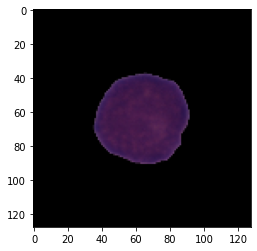

In [ ]:
testimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_10_1_hem.bmp')
testimg = cv2.resize(testimg, (128, 128))
plt.imshow(testimg[:,:,::-1])
testimg = np.expand_dims(testimg, axis = 0)
print(np.round(model.predict(testimg)))

[[0.]]


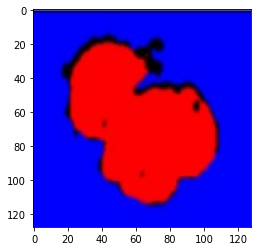

In [ ]:
testimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/check.jpg')
testimg = cv2.resize(testimg, (128, 128))
plt.imshow(testimg[:,:,::-1])
testimg = np.expand_dims(testimg, axis = 0)
print(np.round(model.predict(testimg)))

Load model

In [ ]:
model.save('cancer.h5')
model.save_weights('cancerweights.h5')

In [ ]:
load_model('cancer.h5')